In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv("../content/train.csv", delimiter=';', skiprows=0, low_memory=False)
df_test = pd.read_csv("../content/test.csv", delimiter=';', skiprows=0, low_memory=False)
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


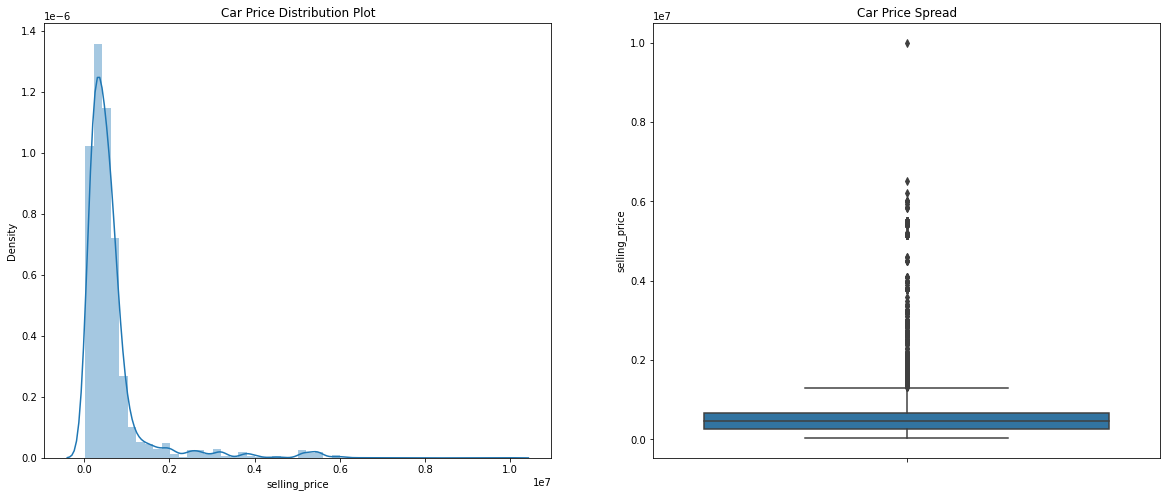

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_train.selling_price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df_train.selling_price)

plt.show()

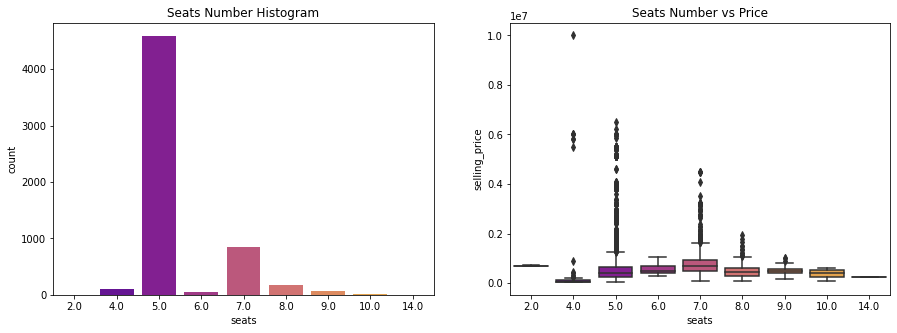

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seats Number Histogram')
sns.countplot(df_train.seats, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Seats Number vs Price')
sns.boxplot(x=df_train.seats, y=df_train.selling_price, palette=("plasma"))

plt.show()

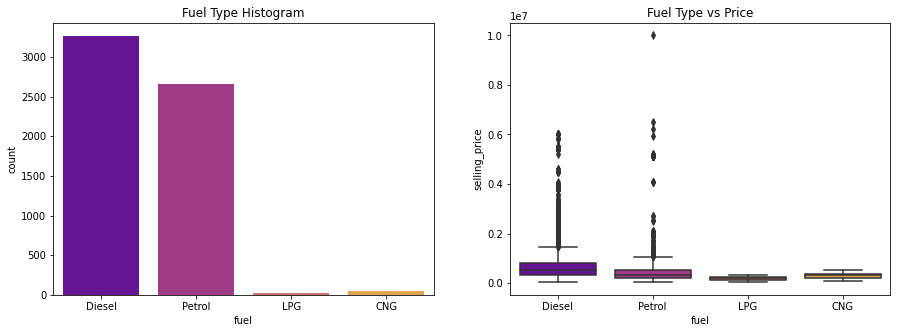

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(df_train.fuel, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=df_train.fuel, y=df_train.selling_price, palette=("plasma"))

plt.show()

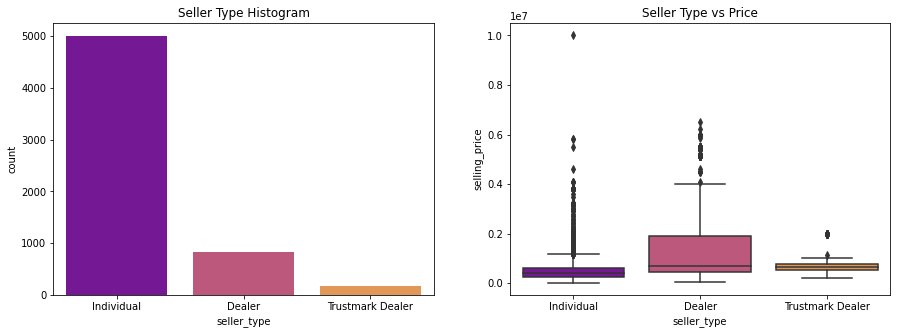

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Seller Type Histogram')
sns.countplot(df_train.seller_type, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Seller Type vs Price')
sns.boxplot(x=df_train.seller_type, y=df_train.selling_price, palette=("plasma"))

plt.show()

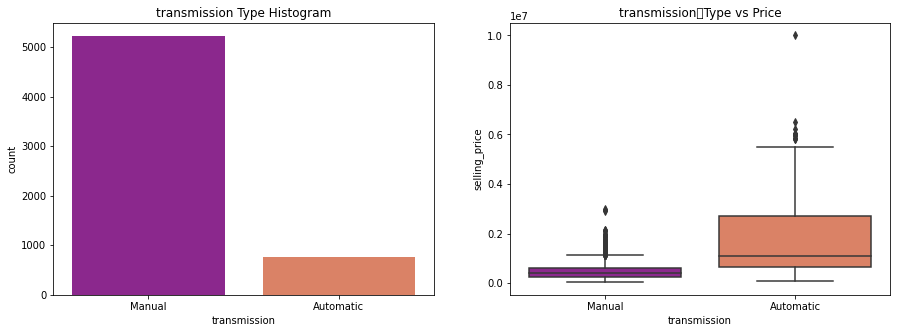

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('transmission Type Histogram')
sns.countplot(df_train.transmission, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('transmission	Type vs Price')
sns.boxplot(x=df_train.transmission, y=df_train.selling_price, palette=("plasma"))

plt.show()

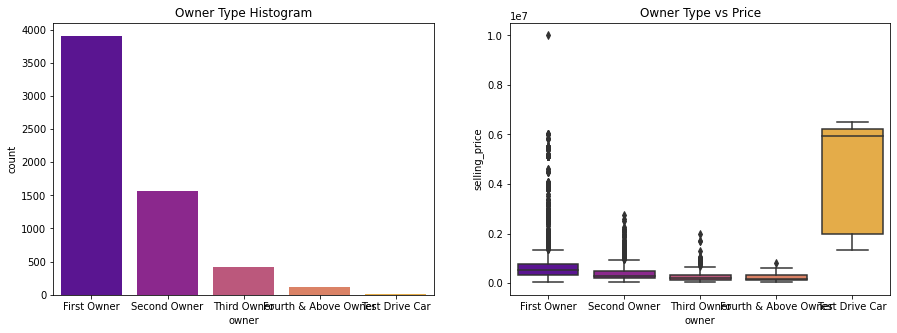

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Owner Type Histogram')
sns.countplot(df_train.owner, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Owner Type vs Price')
sns.boxplot(x=df_train.owner, y=df_train.selling_price, palette=("plasma"))

plt.show()

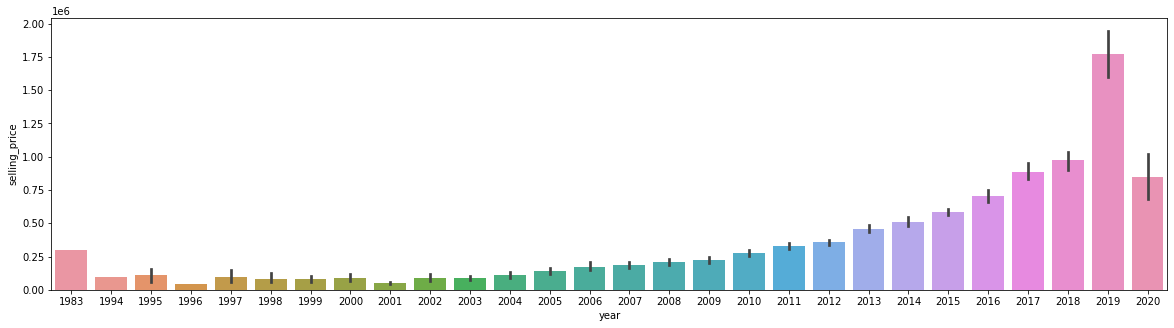

In [ ]:
plt.figure(figsize=(20,5))

sns.barplot('year','selling_price',data=df_train)

plt.show()

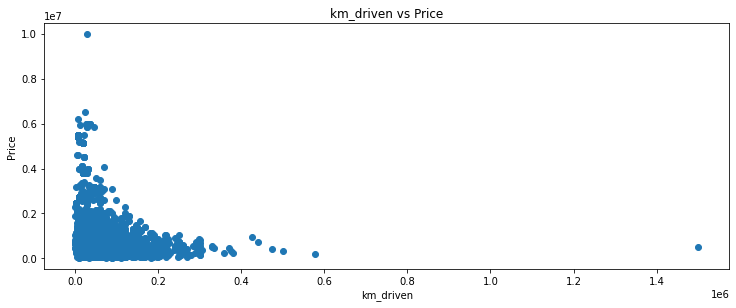

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df_train[x],df_train['selling_price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('km_driven', 1)

plt.tight_layout()

<Figure size 1440x1440 with 0 Axes>

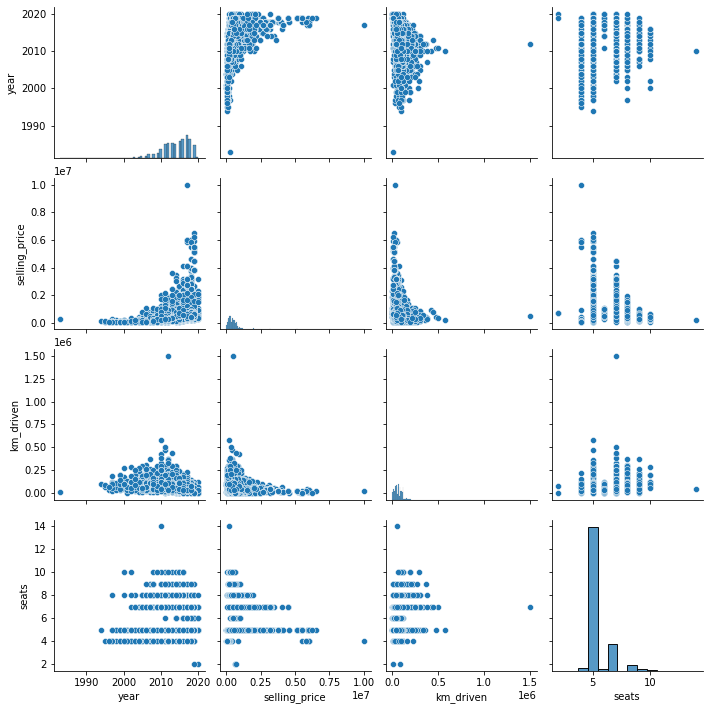

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(df_train)
plt.show()

In [ ]:
df_train.shape

(6000, 13)

In [ ]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [ ]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        154
torque           160
seats            159
dtype: int64

In [ ]:
df_train['engine'] = df_train['engine'].astype(str).str.replace('CC', '')
df_train['mileage'] = df_train['mileage'].astype(str).str.replace('km/kg', '')
df_train['mileage'] = df_train['mileage'].astype(str).str.replace('kmpl','')
df_train['max_power'] = df_train['max_power'].astype(str).str.replace('bhp', '')

In [ ]:
df_train['mileage']=pd.to_numeric(df_train['mileage'],errors='coerce')
df_train['engine']=pd.to_numeric(df_train['engine'],errors='coerce')
df_train['max_power']=pd.to_numeric(df_train['max_power'],errors='coerce')

In [ ]:
df_train['fuel']=df_train['fuel'].replace({'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3})
df_train['transmission']=df_train['transmission'].replace({'Manual': 0, 'Automatic': 1})
df_train['seller_type']=df_train['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})
df_train['owner']=df_train['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})

In [ ]:
df_train.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,5841.000000,5841.000000,5845.000000,5841.000000
mean,2013.814833,6.387764e+05,6.997216e+04,0.472167,0.194667,0.128667,1.460500,19.388137,1464.356959,91.585197,5.429550
std,4.026733,8.066632e+05,5.188961e+04,0.539389,0.463473,0.334859,0.718001,4.055342,508.319157,35.982689,0.977071
min,1983.000000,3.000000e+04,1.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.557498e+05,3.500000e+04,0.000000,0.000000,0.000000,1.000000,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,0.000000,0.000000,0.000000,1.000000,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,1.000000,0.000000,0.000000,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,3.000000,2.000000,1.000000,5.000000,42.000000,3604.000000,400.000000,14.000000


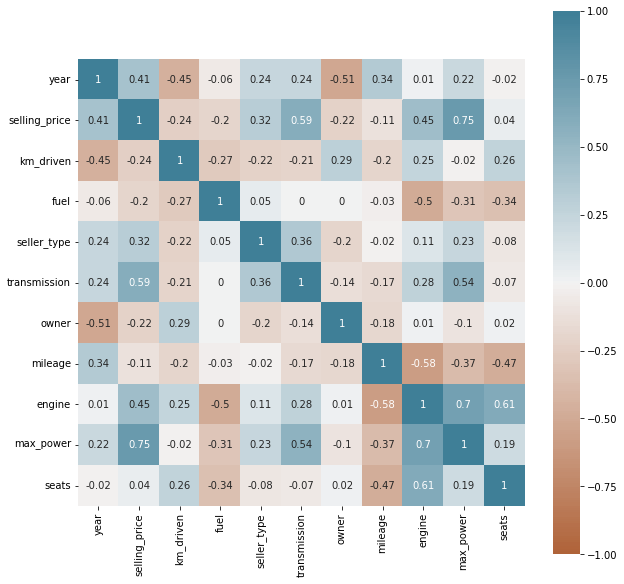

In [ ]:
cmap=sns.diverging_palette(30, 225, n=200)
fig, ax = plt.subplots(figsize=(10,10))  
cor = df_train.corr(method='pearson').round(2)
sns.heatmap(cor,vmin=-1, vmax=1, center=0, cmap=cmap, square=True,ax=ax, annot=True)

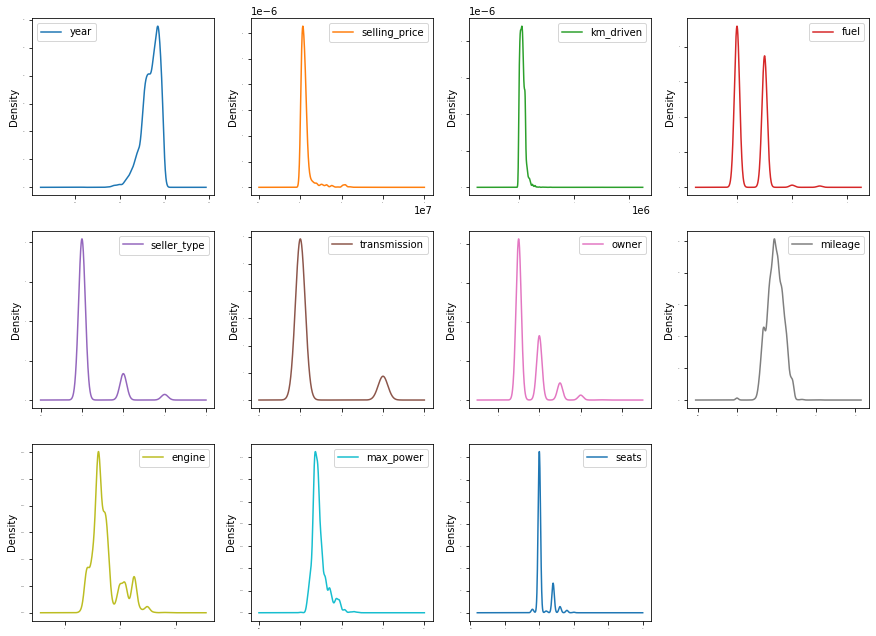

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df_train.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, ax=ax,)
plt.show()

In [ ]:
df_test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0


In [ ]:
df_test.shape

(2128, 13)

In [ ]:
df_test.columns

Index(['Id', 'name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2066 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 216.2+ KB


In [ ]:
df_test.isnull().sum()

Id               0
name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         62
engine          62
max_power       61
torque          62
seats           62
dtype: int64

In [ ]:
df_test['engine'] = df_test['engine'].astype(str).str.replace('CC', '')
df_test['mileage'] = df_test['mileage'].astype(str).str.replace('km/kg', '')
df_test['mileage'] = df_test['mileage'].astype(str).str.replace('kmpl','')
df_test['max_power'] = df_test['max_power'].astype(str).str.replace('bhp', '')

In [ ]:
df_test['mileage']=pd.to_numeric(df_test['mileage'],errors='coerce')
df_test['engine']=pd.to_numeric(df_test['engine'],errors='coerce')
df_test['max_power']=pd.to_numeric(df_test['max_power'],errors='coerce')

In [ ]:
df_test['fuel']=df_test['fuel'].replace({'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3})
df_test['transmission']=df_test['transmission'].replace({'Manual': 0, 'Automatic': 1})
df_test['seller_type']=df_test['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})
df_test['owner']=df_test['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5})

In [ ]:
df_test.describe()

,Id,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,2128.000000,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000,2066.000000,2066.000000,2067.000000,2066.000000
mean,1064.500000,2013.773496,6.938912e+04,0.482143,0.202068,0.130639,1.467105,19.505426,1442.419652,91.327673,5.380445
std,614.445007,4.094030,6.800549e+04,0.541343,0.468626,0.337084,0.732642,3.984948,491.014183,35.373533,0.907587
min,1.000000,1991.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,624.000000,0.000000,4.000000
25%,532.750000,2011.000000,3.327825e+04,0.000000,0.000000,0.000000,1.000000,16.855000,1197.000000,68.050000,5.000000
50%,1064.500000,2015.000000,6.000000e+04,0.000000,0.000000,0.000000,1.000000,19.340000,1248.000000,82.000000,5.000000
75%,1596.250000,2017.000000,9.600000e+04,1.000000,0.000000,0.000000,2.000000,22.370000,1498.000000,100.800000,5.000000
max,2128.000000,2020.000000,2.360457e+06,3.000000,2.000000,1.000000,4.000000,33.440000,3604.000000,280.000000,10.000000


In [ ]:
df_train.fillna(df_train.mode().iloc[0], inplace=True)
df_test.fillna(df_test.mode().iloc[0], inplace=True)

In [ ]:
y_train=df_train['selling_price']
x_train=df_train[['fuel','year','km_driven','seller_type','transmission','owner','mileage','engine','max_power','seats']]
y_test=df_test['Id']
x_test=df_test[['fuel','year','km_driven','seller_type','transmission','owner','mileage','engine','max_power','seats']]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.model_selection import train_test_split
x_training, x_testing, y_training, y_testing = train_test_split(x_train, y_train, test_size=.10, random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_training, y_training)

LogisticRegression()

In [ ]:
pred = model.predict(x_testing)

In [ ]:
predict = model.predict(x_test)
predict

array([645000, 500000, 300000, ..., 200000, 750000, 225000])

In [ ]:
y_test.shape

(2128,)

In [ ]:
predict.reshape(-1,1).shape

(2128, 1)

In [ ]:
y_test

0          1
1          2
2          3
3          4
4          5
        ... 
2123    2124
2124    2125
2125    2126
2126    2127
2127    2128
Name: Id, Length: 2128, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
extra_model = ExtraTreesRegressor(n_estimators=7, random_state=0).fit(x_training, y_training)
extra_predict = extra_model.predict(x_testing)

In [ ]:
predict = extra_model.predict(x_test)
predict

array([ 645000.        ,  860000.        ,  465142.85714286, ...,
        217571.28571429, 1107142.85714286,  340000.        ])

In [ ]:
result=pd.DataFrame({"Id":y_test,"Predicted":predict})
result

,Id,Predicted
0,1,6.450000e+05
1,2,8.600000e+05
2,3,4.651429e+05
3,4,5.500000e+05
4,5,5.721429e+05
...,...,...
2123,2124,6.450000e+05
2124,2125,7.935714e+05
2125,2126,2.175713e+05
2126,2127,1.107143e+06


In [ ]:
result.to_csv("4.csv",index=False)